In [56]:
import glob
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os

import statistics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from scipy.fft import fft, ifft

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold, cross_val_score 




In [57]:
# Load your dataset
all_files = glob.glob('C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files/*.csv')  # List all CSV files in the data directory
print(f"Found {len(all_files)} CSV files.")
# path = "C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_13.csv"
# df = pd.read_csv(path)

Found 55 CSV files.


In [58]:
import random

if len(all_files) >= 10:
    sample_files = random.sample(all_files, 10)  # Randomly select 10 files
else:
    sample_files = all_files  # Use all files if fewer than 10 are available

print(f"Selected files: {sample_files}")


Selected files: ['C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_25.csv', 'C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_55.csv', 'C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_57.csv', 'C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_36.csv', 'C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_38.csv', 'C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_1.csv', 'C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_47.csv', 'C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_16.csv', 'C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_13.csv', 'C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_50.csv']


In [59]:
import pandas as pd

# List to store individual data frames
data_frames = []

# Load the CSV files into data frames
for file in sample_files:
    df = pd.read_csv(file)
    df = df.replace('Movement time',6)
    data_frames.append(df)

# Combine the data frames into a single one
combined_df = pd.concat(data_frames, ignore_index=True)

# Check the first few rows of the combined data
print(combined_df.head())


C:\Users\merug\AppData\Local\Temp\ipykernel_18664\1467094991.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\merug\AppData\Local\Temp\ipykernel_18664\1467094991.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\merug\AppData\Local\Temp\ipykernel_18664\1467094991.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


   time target     Fpz-Cz     Pz-Oz  horizontal  submental
0  0.00      0  16.758974  3.276923   70.688889   0.000003
1  0.01      0  24.517949 -3.369231   72.155556   0.000003
2  0.02      0  21.989744 -3.738462   75.577778   0.000003
3  0.03      0  13.533333 -1.338462   86.333333   0.000003
4  0.04      0  24.953846  4.938462   74.600000   0.000003


In [60]:
print(len(combined_df))

83322000


In [61]:
# Check for missing values
print(combined_df.isnull().sum())
print(df.isnull().sum())
# Option 1: Remove rows with missing values
# combined_df = combined_df.dropna()

# Option 2: Fill missing values (for example, with the median)
# combined_df = combined_df.fillna(combined_df.median())


time          0
target        0
Fpz-Cz        0
Pz-Oz         0
horizontal    0
submental     0
dtype: int64
time          0
target        0
Fpz-Cz        0
Pz-Oz         0
horizontal    0
submental     0
dtype: int64


In [62]:
import pandas as pd

# Define a label mapping to standardize the labels
label_map = {
    'Movement time': 6,  # Map 'Movement time' to a specific label (e.g., 5)
    '0': 0,              # Map string '0' to integer 0
    '1': 1,              # Map string '1' to integer 1
    '2': 2,              # Map string '2' to integer 2
    '3': 3,              # Map string '3' to integer 3
    '4': 4,              # Map string '4' to integer 4
    '5': 5               # Map string '5' to integer 5
}

# Process each file and clean the labels
cleaned_data_frames = []

for file in sample_files:
    df = pd.read_csv(file, low_memory=False)  # Reading the file
    # Standardize the target column (replace all string labels with numeric values)
    df['target'] = df['target'].replace(label_map)
    
    # Convert target column to integer to handle any leftover strings
    df['target'] = df['target'].astype(int)
    
    cleaned_data_frames.append(df)

# Combine the cleaned DataFrames into one
combined_df = pd.concat(cleaned_data_frames, ignore_index=True)

# Check the cleaned data
print(combined_df['target'].value_counts())


C:\Users\merug\AppData\Local\Temp\ipykernel_18664\1562184843.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace(label_map)
C:\Users\merug\AppData\Local\Temp\ipykernel_18664\1562184843.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace(label_map)
C:\Users\merug\AppData\Local\Temp\ipykernel_18664\1562184843.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly cal

target
0    56577000
2    13809000
5     5949000
1     2892000
3     2223000
4     1857000
6       15000
Name: count, dtype: int64


In [63]:
import pandas as pd
import numpy as np

# Combine the cleaned data from all CSV files into a single DataFrame
combined_df = pd.concat(cleaned_data_frames, ignore_index=True)

# Display the class distribution in the dataset before balancing
print("Class distribution before balancing:")
print(combined_df['target'].value_counts())

# Determine the minimum class size
min_class_size = combined_df['target'].value_counts().min()

# Create a balanced dataset using random sampling for each class
balanced_df = combined_df.groupby('target').apply(lambda x: x.sample(n=min_class_size, random_state=42))

# Reset the index for the balanced dataframe
balanced_df = balanced_df.reset_index(drop=True)

# Display the class distribution in the dataset after balancing
print("\nClass distribution after balancing:")
print(balanced_df['target'].value_counts())

# Optionally, you can shuffle the data
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the first few rows of the balanced data
print(balanced_df.head())


Class distribution before balancing:
target
0    56577000
2    13809000
5     5949000
1     2892000
3     2223000
4     1857000
6       15000
Name: count, dtype: int64

Class distribution after balancing:
target
0    15000
1    15000
2    15000
3    15000
4    15000
5    15000
6    15000
Name: count, dtype: int64
       time  target     Fpz-Cz      Pz-Oz  horizontal     submental
0  53768.34       5 -18.287179   6.876923    1.755556  1.073371e-06
1  42514.23       3   5.004151  16.391941  -20.864957  9.502453e-07
2  39014.23       2   6.528694 -11.249084    4.040293  3.609302e-06
3  63297.26       2   2.230281   3.960440    3.809035  3.059892e-06
4  16804.84       0 -24.286203 -45.300366  -24.473260  3.955845e-06


C:\Users\merug\AppData\Local\Temp\ipykernel_18664\2373694059.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = combined_df.groupby('target').apply(lambda x: x.sample(n=min_class_size, random_state=42))


In [64]:
print(len(balanced_df))

105000


In [65]:
df=balanced_df

In [66]:
# # Map the string labels to integers first (if any)
# label_map = {
#     'Movement time': 6,  # Replace 'Movement time' with 6
#     '0': 0,              # Map string '0' to integer 0
#     '1': 1,              # Map string '1' to integer 1
#     '2': 2,              # Map string '2' to integer 2
#     '3': 3,              # Map string '3' to integer 3
#     '4': 4,              # Map string '4' to integer 4
#     '5': 5               # Map string '5' to integer 5
# }

# # Apply the mapping to the 'target' column to standardize the labels
# combined_df['target'] = combined_df['target'].replace(label_map)

# # Convert all values in 'target' to integers to handle any leftover string labels
# combined_df['target'] = combined_df['target'].astype(int)
# df=combined_df

In [67]:
df.head()

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental
0,53768.34,5,-18.287179,6.876923,1.755556,1.073371e-06
1,42514.23,3,5.004151,16.391941,-20.864957,9.502453e-07
2,39014.23,2,6.528694,-11.249084,4.040293,3.609302e-06
3,63297.26,2,2.230281,3.960440,3.809035,3.059892e-06
4,16804.84,0,-24.286203,-45.300366,-24.473260,3.955845e-06


stats of all signals

In [68]:
df[['Fpz-Cz','Pz-Oz','horizontal','submental']].mean()

Fpz-Cz       -0.023113
Pz-Oz         0.088675
horizontal    0.118721
submental     0.000002
dtype: float64

In [69]:
df[['Fpz-Cz','Pz-Oz','horizontal','submental']].median()

Fpz-Cz        0.035165
Pz-Oz        -0.046154
horizontal    0.178266
submental     0.000002
dtype: float64

In [70]:
df[['Fpz-Cz','Pz-Oz','horizontal','submental']].describe()

,Fpz-Cz,Pz-Oz,horizontal,submental
count,105000.000000,105000.000000,105000.000000,1.050000e+05
mean,-0.023113,0.088675,0.118721,2.013652e-06
std,27.029768,21.880260,63.566807,1.367652e-06
min,-197.000000,-201.000000,-674.585104,-5.439013e-06
25%,-11.123321,-7.589744,-14.582418,7.740000e-07
50%,0.035165,-0.046154,0.178266,2.000025e-06
75%,10.788767,7.331868,14.523810,3.044762e-06
max,178.225885,197.571429,614.100122,5.335103e-06


check null values and data distribution 

In [71]:
print(df.isnull().sum())

time          0
target        0
Fpz-Cz        0
Pz-Oz         0
horizontal    0
submental     0
dtype: int64


replacing the movement data to numeric value

In [72]:
df['target'].unique()

array([5, 3, 2, 0, 4, 1, 6])

In [73]:
print(combined_df['target'].unique())

[0 1 2 5 3 4 6]


In [74]:
df[df['target']=="Movement time"]

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental


In [75]:

df['target'] = df['target'].replace(to_replace='Movement time', value=6)

In [76]:
df[df['target']==6]

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental
18,42583.09,6,-15.230769,1.533333,-20.203663,2.980025e-06
28,28082.79,6,-49.652015,12.240293,13.763126,7.036083e-07
70,42585.30,6,-12.039560,-2.009524,-29.722589,2.067314e-06
78,42588.26,6,-10.395604,-3.879365,-4.021490,2.238549e-06
80,33377.44,6,27.705495,10.292063,-396.677167,3.119108e-06
...,...,...,...,...,...,...
104954,28089.81,6,63.380952,-29.383150,-372.073260,4.185319e-06
104971,42578.74,6,-65.516484,-38.520635,-376.211477,3.045925e-06
104977,42575.28,6,-161.156044,124.549206,-109.681563,2.963713e-06
104978,33912.23,6,-8.364835,-1.911111,28.342857,2.116385e-06


In [77]:
df['target'].unique()

array([5, 3, 2, 0, 4, 1, 6])

target
5    15000
3    15000
2    15000
0    15000
4    15000
1    15000
6    15000
Name: count, dtype: int64


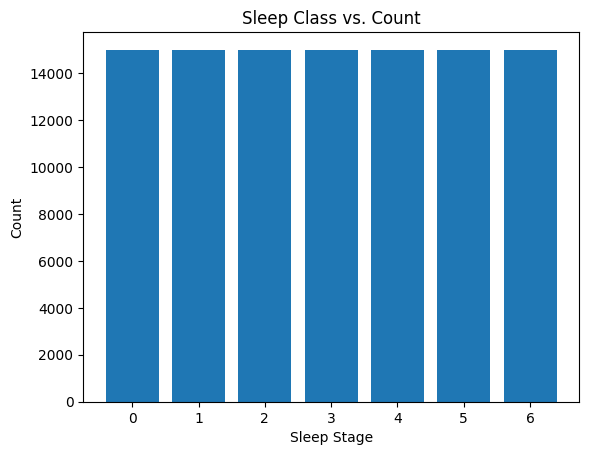

In [78]:
counts = df['target'].value_counts()
print(counts)
x = [0,1,2,3,4,5,6]

plt.xlabel("Sleep Stage")
plt.ylabel("Count")

plt.title('Sleep Class vs. Count')

plt.bar(x,counts)
plt.show() 

In [79]:
df = df.drop(df[df['target'] == 0].index)

In [80]:
df['target'].unique()

array([5, 3, 2, 4, 1, 6])

Initial Class Distribution:
target
5    15000
3    15000
2    15000
4    15000
1    15000
6    15000
Name: count, dtype: int64


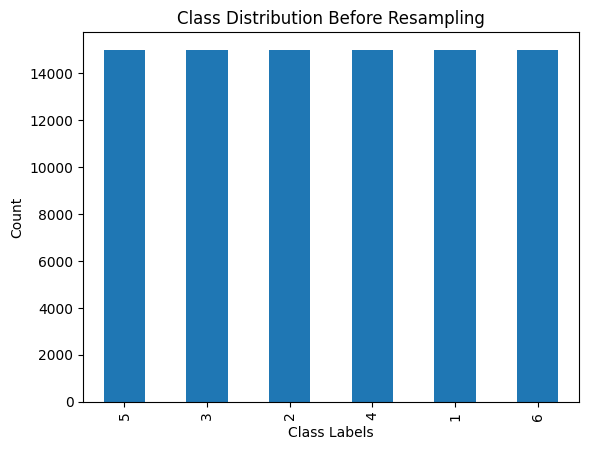

In [81]:
print("Initial Class Distribution:")
print(df['target'].value_counts())

# Plot the class distribution before resampling
df['target'].value_counts().plot(kind='bar', title='Class Distribution Before Resampling')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

# Visuals

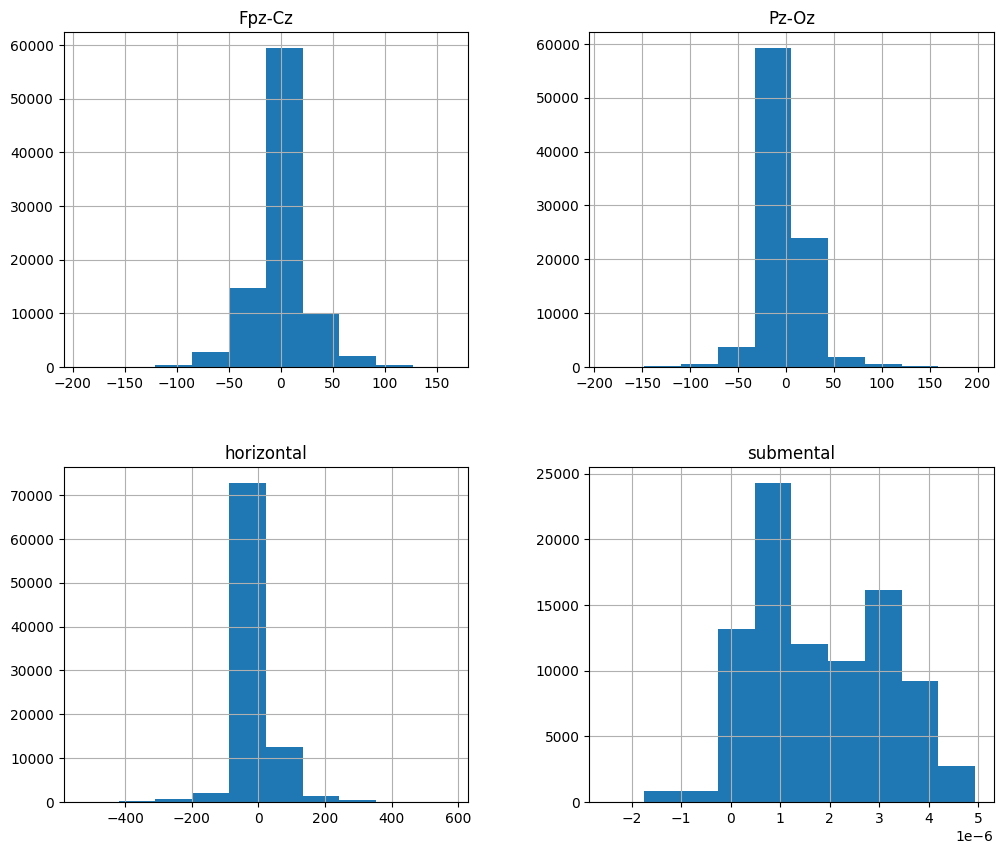

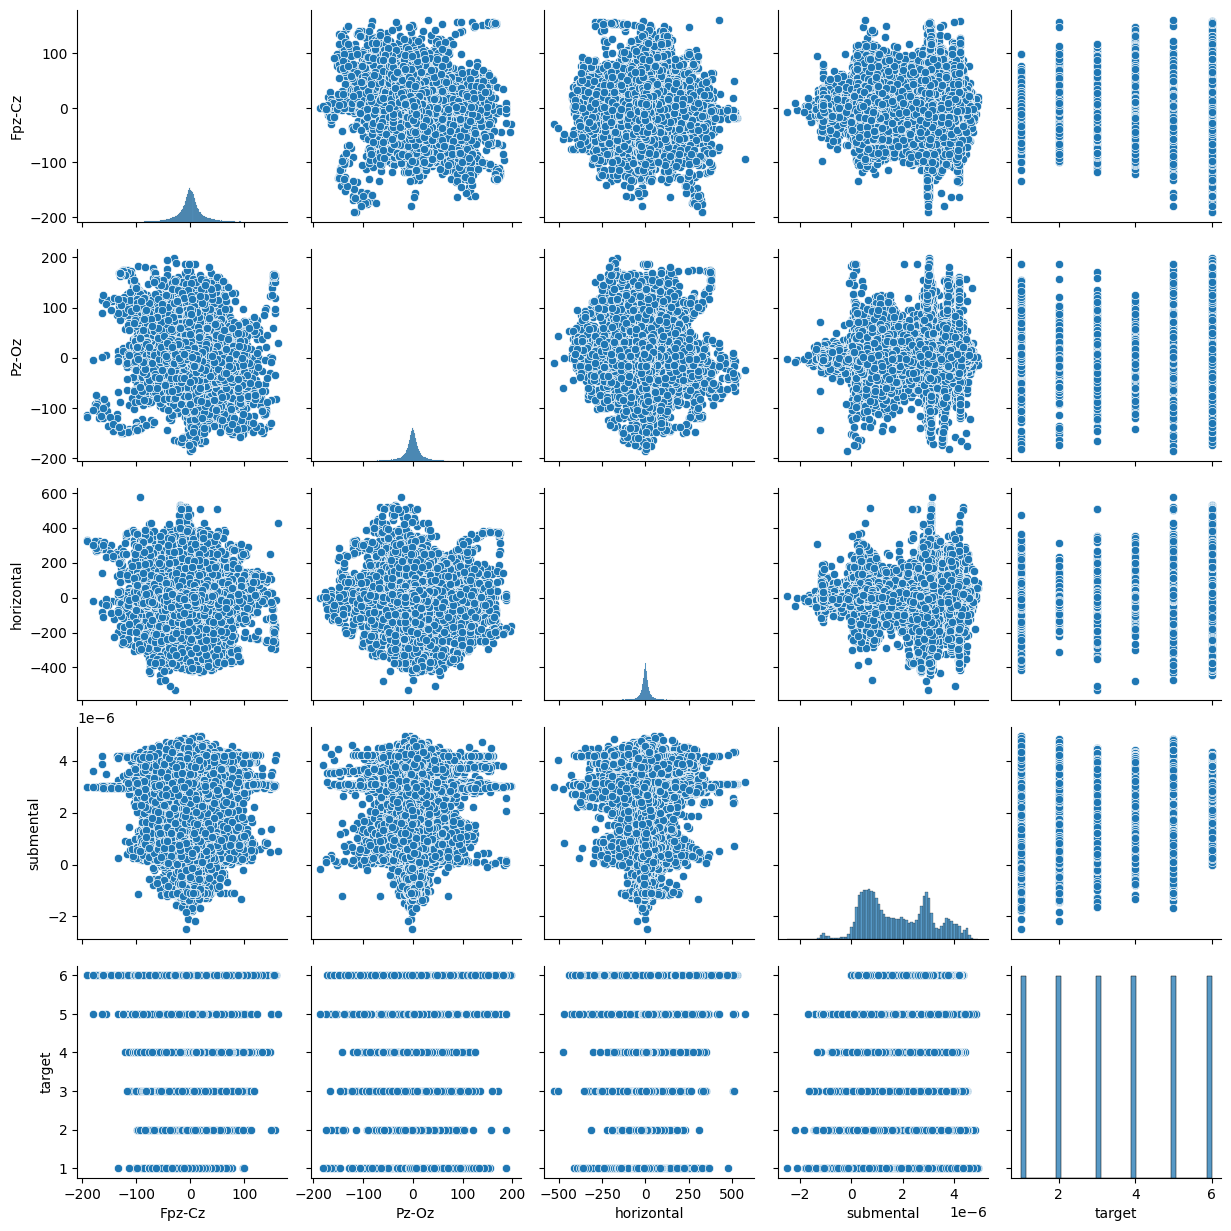

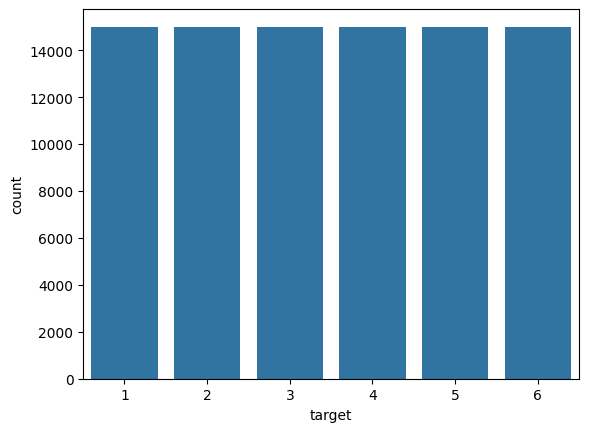

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of features
df[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'submental']].hist(figsize=(12, 10))
plt.show()

# Visualize pairwise relationships
sns.pairplot(df[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'submental', 'target']])
plt.show()

# Visualize class distribution
sns.countplot(x='target', data=df)
plt.show()


# correlation before smote

                time    target    Fpz-Cz     Pz-Oz  horizontal  submental
time        1.000000 -0.196789 -0.005289 -0.004540   -0.016087  -0.212398
target     -0.196789  1.000000  0.001737  0.006547    0.013595  -0.124443
Fpz-Cz     -0.005289  0.001737  1.000000 -0.277556   -0.057258   0.003867
Pz-Oz      -0.004540  0.006547 -0.277556  1.000000   -0.038893  -0.011958
horizontal -0.016087  0.013595 -0.057258 -0.038893    1.000000   0.008512
submental  -0.212398 -0.124443  0.003867 -0.011958    0.008512   1.000000


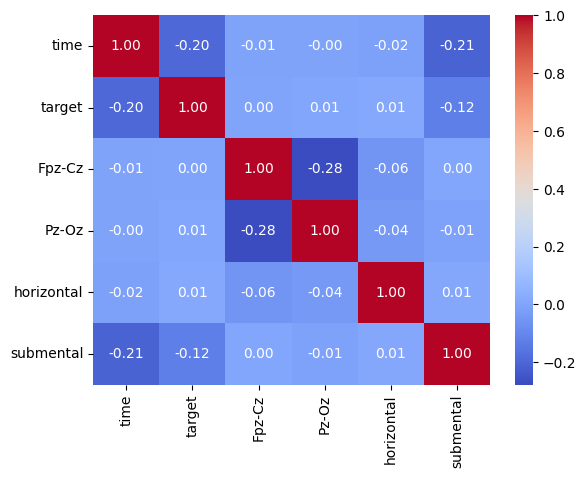

Fpz-Cz        0.001737
Pz-Oz         0.006547
horizontal    0.013595
submental    -0.124443
target        1.000000
Name: target, dtype: float64


In [83]:
# Pearson correlation matrix
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Check correlation with target variable
print(df[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'submental', 'target']].corr()['target'])


In [84]:
from scipy.stats import chi2_contingency
import pandas as pd

# Discretize continuous variables into categories
df['Fpz-Cz_binned'] = pd.cut(df['Fpz-Cz'], bins=[-float('inf'), -1, 0, 1, float('inf')], labels=['low', 'medium', 'high', 'very high'])
df['Pz-Oz_binned'] = pd.cut(df['Pz-Oz'], bins=[-float('inf'), -1, 0, 1, float('inf')], labels=['low', 'medium', 'high', 'very high'])
df['submental_binned'] = pd.cut(df['submental'], bins=[-float('inf'), -0.01, 0.01, float('inf')], labels=['low', 'medium', 'high'])

# Check relationship between 'target' and individual features
for feature in ['Fpz-Cz_binned', 'Pz-Oz_binned', 'submental_binned']:
    # Create a contingency table between 'target' and the binned feature
    contingency_table = pd.crosstab(df['target'], df[feature])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Display results
    print(f"Feature: {feature}")
    print(f"Chi-square test statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:\n", expected)
    print("-" * 30)


Feature: Fpz-Cz_binned
Chi-square test statistic: 1361.0547072893783
p-value: 3.94685249185963e-281
Degrees of freedom: 15
Expected frequencies:
 [[7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]]
------------------------------
Feature: Pz-Oz_binned
Chi-square test statistic: 1511.3733794693285
p-value: 0.0
Degrees of freedom: 15
Expected frequencies:
 [[6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 68

- Fpz-Cz_binned and Pz-Oz_binned show significant relationships with the target, based on the very low p-values (0.0). These features appear to have strong associations with the target variable.
- submental_binned, on the other hand, shows no significant relationship with the target. Its p-value is 1.0, indicating no evidence of an association between submental_binned and the target.


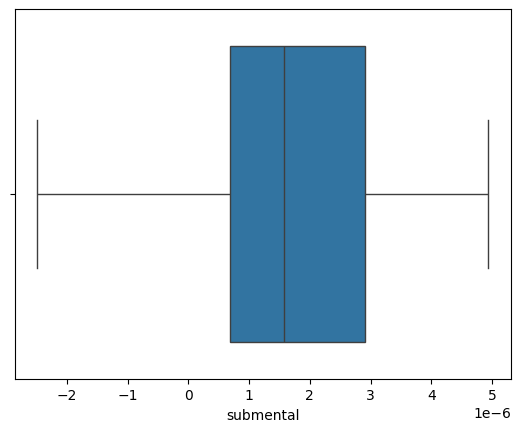

In [85]:
sns.boxplot(x=df['submental'])
plt.show()


# dropping submental column as per chi sqare analyis

In [86]:
df.head()

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental,Fpz-Cz_binned,Pz-Oz_binned,submental_binned
0,53768.34,5,-18.287179,6.876923,1.755556,1.073371e-06,low,very high,medium
1,42514.23,3,5.004151,16.391941,-20.864957,9.502453e-07,very high,very high,medium
2,39014.23,2,6.528694,-11.249084,4.040293,3.609302e-06,very high,low,medium
3,63297.26,2,2.230281,3.960440,3.809035,3.059892e-06,very high,very high,medium
6,51307.72,4,-25.314286,-17.799267,7.493284,3.839896e-07,low,low,medium


In [87]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [88]:
# # Pearson correlation matrix
# correlation_matrix = df.corr(method='pearson')
# print(correlation_matrix)

# # Visualizing the correlation matrix
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.show()

# # Check correlation with target variable
# print(df[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'submental', 'target']].corr()['target'])


In [89]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming X_resampled is the resampled features and y_resampled is the resampled target
# # Re-create the full resampled data for correlation analysis (optional)
# df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
# df_resampled['target'] = y_resampled

# # Pearson correlation matrix on resampled data
# correlation_matrix_resampled = df_resampled.corr(method='pearson')
# print(correlation_matrix_resampled)

# # Visualize the correlation matrix for resampled data
# sns.heatmap(correlation_matrix_resampled, annot=True, cmap='coolwarm', fmt='.2f')
# plt.show()

# # Check correlation with target variable in resampled data
# print(df_resampled[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'target']].corr()['target'])


Chi-square Test for Categorical Variables

In [90]:
from scipy.stats import chi2_contingency
import pandas as pd

# Discretize continuous variables into categories
df['Fpz-Cz_binned'] = pd.cut(df['Fpz-Cz'], bins=[-float('inf'), -1, 0, 1, float('inf')], labels=['low', 'medium', 'high', 'very high'])
df['Pz-Oz_binned'] = pd.cut(df['Pz-Oz'], bins=[-float('inf'), -1, 0, 1, float('inf')], labels=['low', 'medium', 'high', 'very high'])
df['submental_binned'] = pd.cut(df['submental'], bins=[-float('inf'), -0.01, 0.01, float('inf')], labels=['low', 'medium', 'high'])

# Check relationship between 'target' and individual features
for feature in ['Fpz-Cz_binned', 'Pz-Oz_binned', 'submental_binned']:
    # Create a contingency table between 'target' and the binned feature
    contingency_table = pd.crosstab(df['target'], df[feature])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Display results
    print(f"Feature: {feature}")
    print(f"Chi-square test statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:\n", expected)
    print("-" * 30)


Feature: Fpz-Cz_binned
Chi-square test statistic: 1361.0547072893783
p-value: 3.94685249185963e-281
Degrees of freedom: 15
Expected frequencies:
 [[7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]
 [7026.16666667  448.66666667  428.33333333 7096.83333333]]
------------------------------
Feature: Pz-Oz_binned
Chi-square test statistic: 1511.3733794693285
p-value: 0.0
Degrees of freedom: 15
Expected frequencies:
 [[6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 6869.5       ]
 [6931.          608.83333333  590.66666667 68

In [91]:
# correlation_matrix = X_resampled.corr()
# plt.figure(figsize=(10, 8))
# plt.title('Feature Correlation Matrix')
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()


In [92]:

# Separate features and target
X = df.drop(columns=['target', 'submental','submental_binned','Fpz-Cz_binned','Pz-Oz_binned'])  # Features
y = df['target']  # Target



In [93]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt

In [94]:
# X = df_resampled.drop(columns=['target'])
# y=df_resampled['target']

In [95]:
# print(X.head())

In [96]:
# print(X.shape)

In [97]:
# print(y.shape)

Random Forest Classifier:
Accuracy: 0.5792222222222222
Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.49      0.47      3041
           2       0.54      0.23      0.32      3016
           3       0.47      0.55      0.51      3017
           4       0.66      0.60      0.63      3029
           5       0.47      0.64      0.54      3020
           6       0.92      0.99      0.95      2877

    accuracy                           0.58     18000
   macro avg       0.59      0.58      0.57     18000
weighted avg       0.58      0.58      0.57     18000

Confusion Matrix:
[[1478  231  326   77  871   58]
 [ 695  685  590  207  793   46]
 [ 355  104 1668  514  324   52]
 [ 241   43  642 1825  227   51]
 [ 425  201  289  134 1934   37]
 [   0    0   31   10    0 2836]]


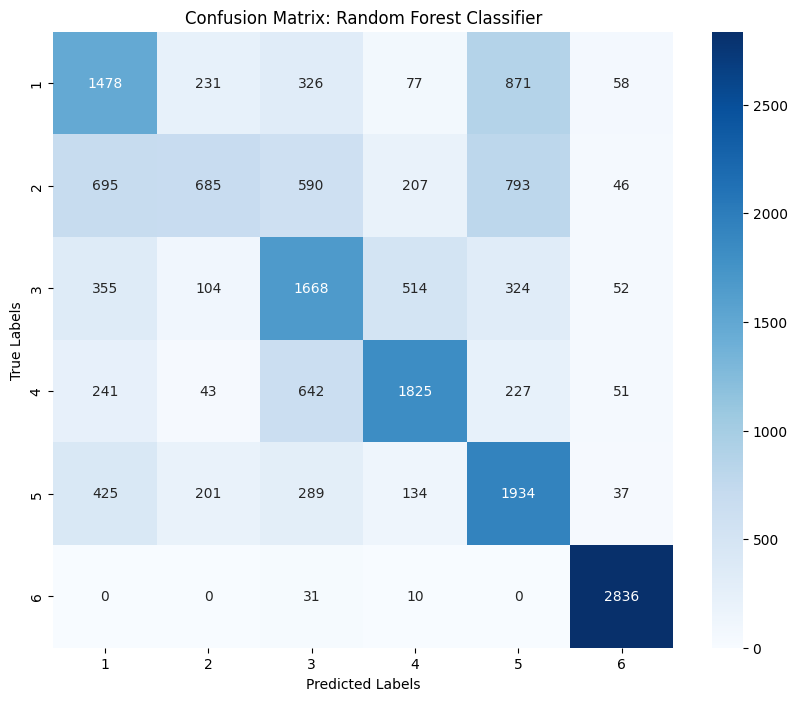

In [98]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Split the data into train-test sets
# Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest Classifier with optimizations
rf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42, n_jobs=-1)  # Optimized parameters
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
# Evaluate the model
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix: Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Train Accuracy: 0.6018055555555556
Test Accuracy: 0.5792222222222222


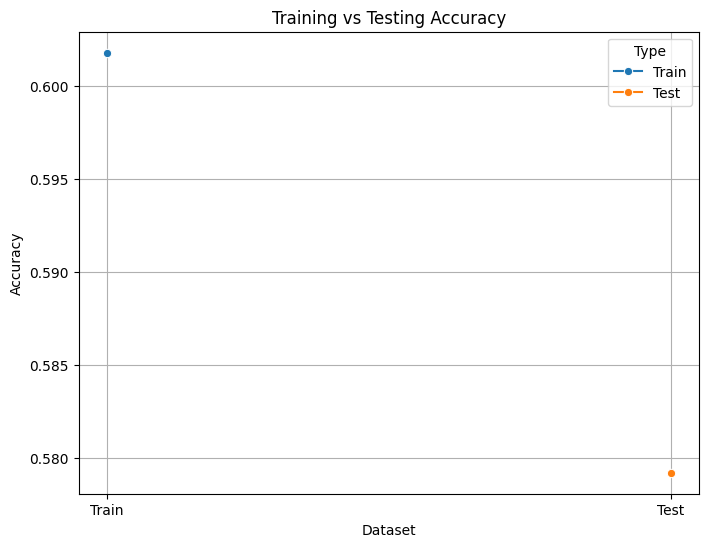

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Predict on train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Accuracy': [train_accuracy, test_accuracy],
    'Type': ['Train', 'Test']
}
df = pd.DataFrame(accuracy_data)

# Line plot for Training vs Testing accuracy using seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Type', y='Accuracy', hue='Type', marker='o')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Train Accuracy: 0.6018055555555556
Test Accuracy: 0.5792222222222222


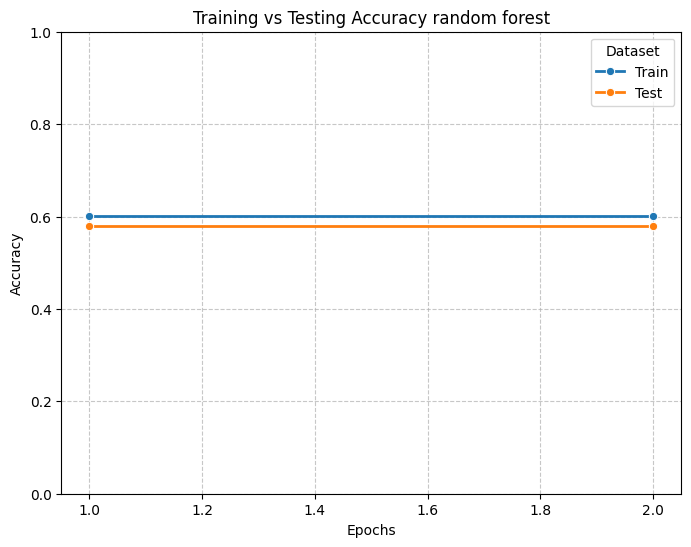

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Predict on train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Epoch': [1, 2],  # Assuming one epoch for simplicity
    'Train': [train_accuracy, train_accuracy],  # Replace with actual per-epoch accuracies if available
    'Test': [test_accuracy, test_accuracy],     # Replace with actual per-epoch accuracies if available
}

df = pd.DataFrame(accuracy_data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Epoch', var_name='Type', value_name='Accuracy')

# Line plot for Training and Testing accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Accuracy', hue='Type', marker='o', linewidth=2)
plt.title('Training vs Testing Accuracy random forest')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is in [0, 1] for better understanding
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()


Train Accuracy: 0.6018055555555556
Test Accuracy: 0.5792222222222222


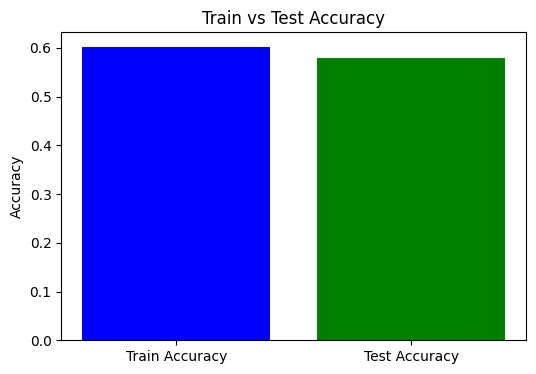

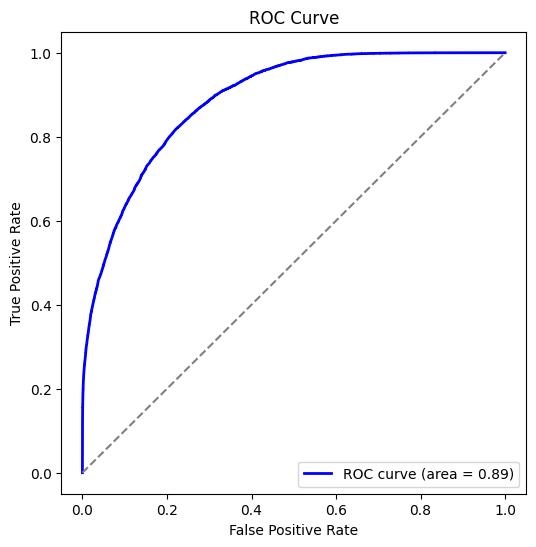

In [101]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Predict on train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Plot Train vs Test Accuracy
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

# ROC Curve
# Binarize the output for multi-class classification
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5,6])
y_train_bin = label_binarize(y_train, classes=[1, 2, 3, 4, 5,6])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), rf.predict_proba(X_test).ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

decision tree

Decision Tree Accuracy: 0.4499444444444444
Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.39      0.33      3041
           2       0.47      0.12      0.19      3016
           3       0.36      0.16      0.22      3017
           4       0.45      0.59      0.51      3029
           5       0.39      0.62      0.48      3020
           6       0.88      0.83      0.85      2877

    accuracy                           0.45     18000
   macro avg       0.47      0.45      0.43     18000
weighted avg       0.47      0.45      0.43     18000

Decision Tree Confusion Matrix:
[[1199  248  116  408 1005   65]
 [ 994  365  176  466  987   28]
 [ 875   24  478  966  583   91]
 [ 360    0  363 1796  415   95]
 [ 627  140  108  217 1881   47]
 [ 271    0  105  121    0 2380]]


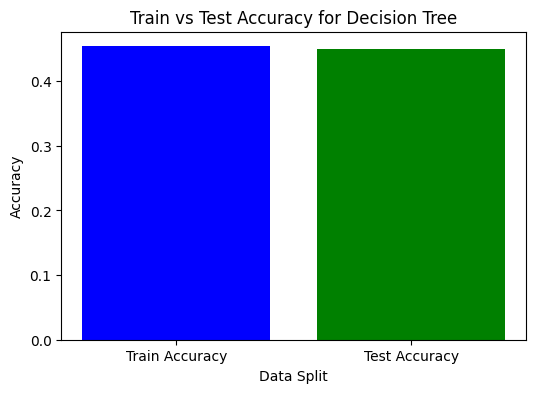

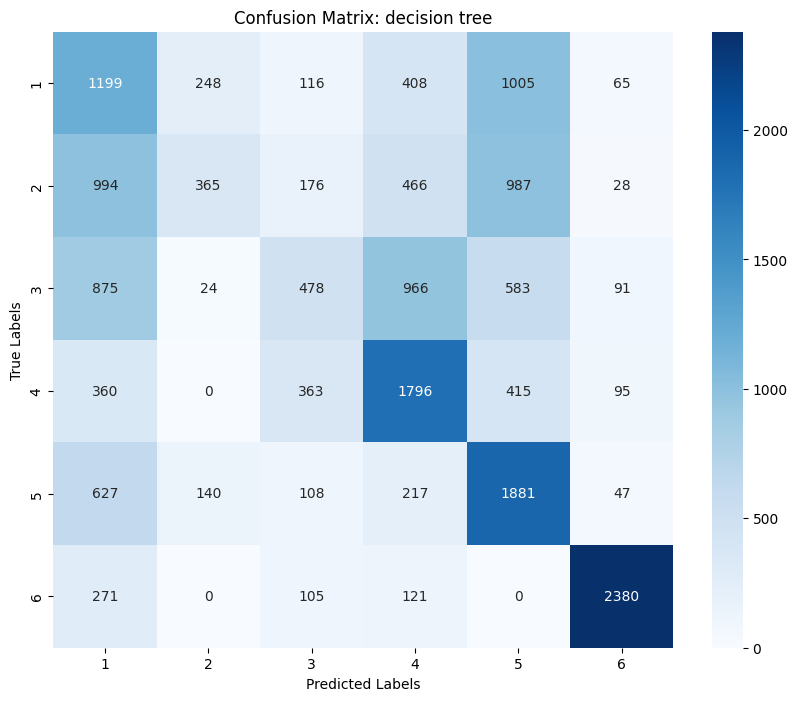

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42,max_depth=5)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Plot Train vs Test Accuracy for Decision Tree
train_accuracy = dt.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title("Train vs Test Accuracy for Decision Tree")
plt.xlabel("Data Split")
plt.ylabel("Accuracy")
plt.show()
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix: decision tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
# (Optional) Plot ROC curve if it's a binary classification (skipped here as it's a multi-class problem)


Train Accuracy: 0.45390277777777777
Test Accuracy: 0.4499444444444444


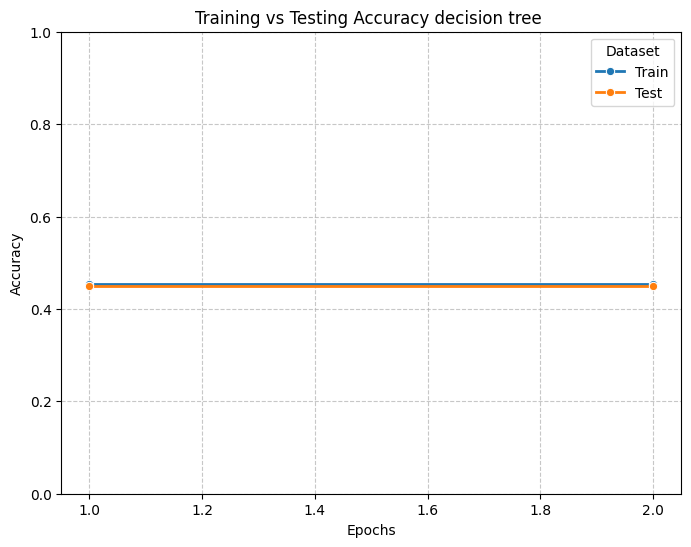

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Predict on train and test data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Epoch': [1, 2],  # Assuming one epoch for simplicity
    'Train': [train_accuracy, train_accuracy],  # Replace with actual per-epoch accuracies if available
    'Test': [test_accuracy, test_accuracy],     # Replace with actual per-epoch accuracies if available
}

df = pd.DataFrame(accuracy_data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Epoch', var_name='Type', value_name='Accuracy')

# Line plot for Training and Testing accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Accuracy', hue='Type', marker='o', linewidth=2)
plt.title('Training vs Testing Accuracy decision tree ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is in [0, 1] for better understanding
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()


Train Accuracy: 0.45390277777777777
Test Accuracy: 0.4499444444444444


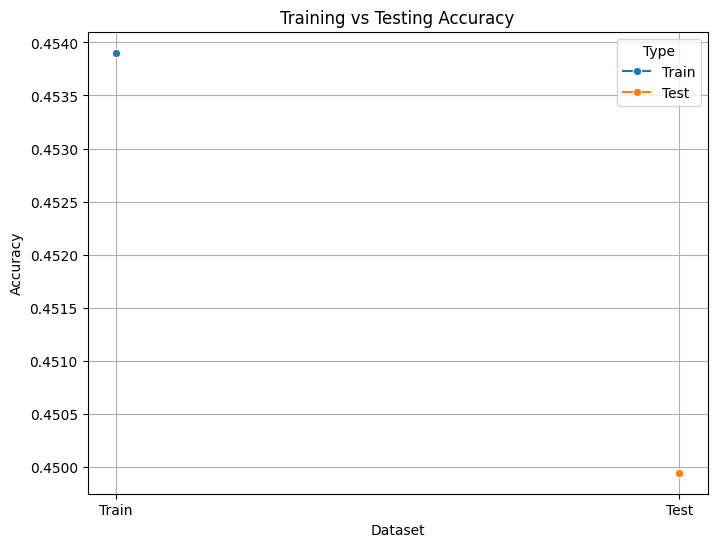

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd

# Predict on train and test data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Accuracy': [train_accuracy, test_accuracy],
    'Type': ['Train', 'Test']
}
df = pd.DataFrame(accuracy_data)

# Line plot for Training vs Testing accuracy using seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Type', y='Accuracy', hue='Type', marker='o')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


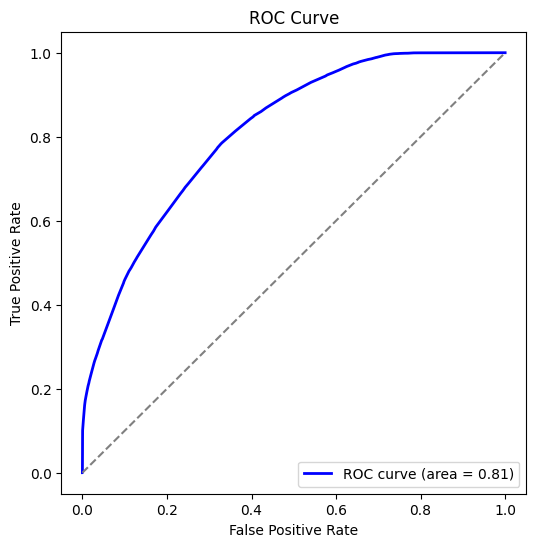

In [105]:
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5,6])
y_train_bin = label_binarize(y_train, classes=[1, 2, 3, 4, 5,6])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), dt.predict_proba(X_test).ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Xg Boost

c:\Users\merug\Desktop\nlp\nlp\lib\site-packages\xgboost\core.py:158: UserWarning: [18:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6342777777777778
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      3041
           1       0.51      0.39      0.44      3016
           2       0.56      0.57      0.57      3017
           3       0.67      0.72      0.69      3029
           4       0.54      0.63      0.58      3020
           5       0.95      0.99      0.97      2877

    accuracy                           0.63     18000
   macro avg       0.63      0.64      0.63     18000
weighted avg       0.63      0.63      0.63     18000

XGBoost Confusion Matrix:
[[1583  435  258  124  614   27]
 [ 489 1173  467  235  632   20]
 [ 227  271 1722  530  237   30]
 [ 134  115  406 2169  173   32]
 [ 357  324  216  188 1909   26]
 [   2    4    5    4    1 2861]]


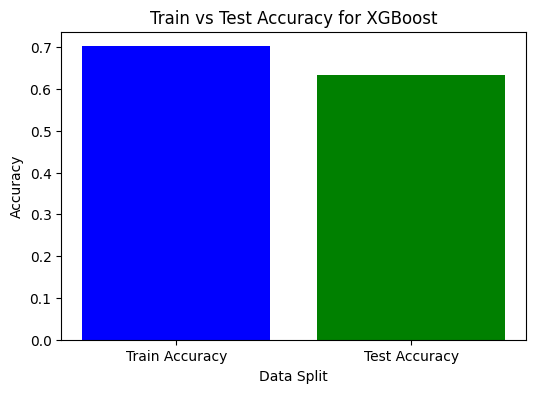

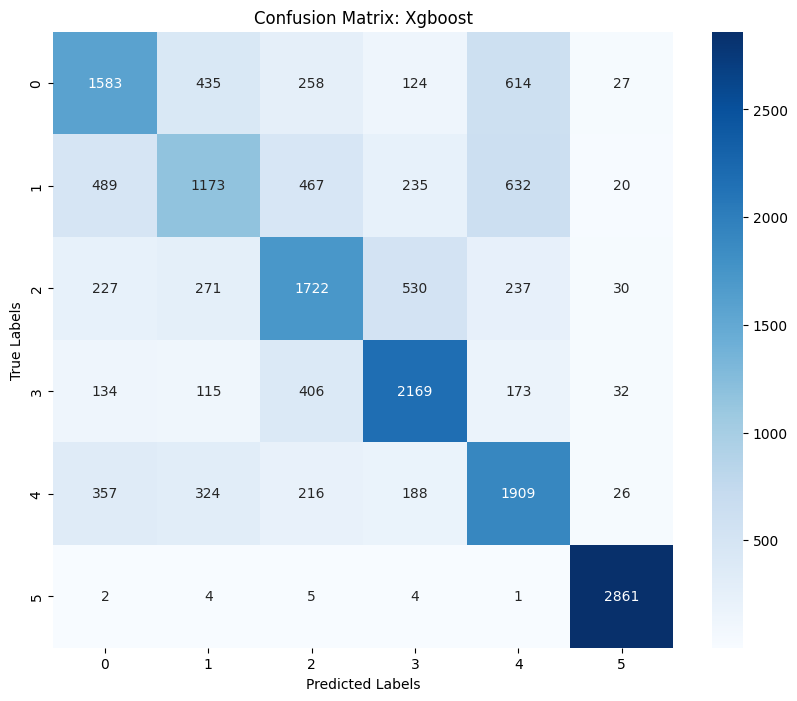

In [106]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
y=y-1
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Plot Train vs Test Accuracy for XGBoost
train_accuracy_xgb = xgb_model.score(X_train, y_train)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy_xgb, test_accuracy_xgb], color=['blue', 'green'])
plt.title("Train vs Test Accuracy for XGBoost")
plt.xlabel("Data Split")
plt.ylabel("Accuracy")
plt.show()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix: Xgboost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
# (Optional) Plot ROC curve if it's a binary classification (skipped here as it's a multi-class problem)


Train Accuracy: 0.7018194444444444
Test Accuracy: 0.6342777777777778


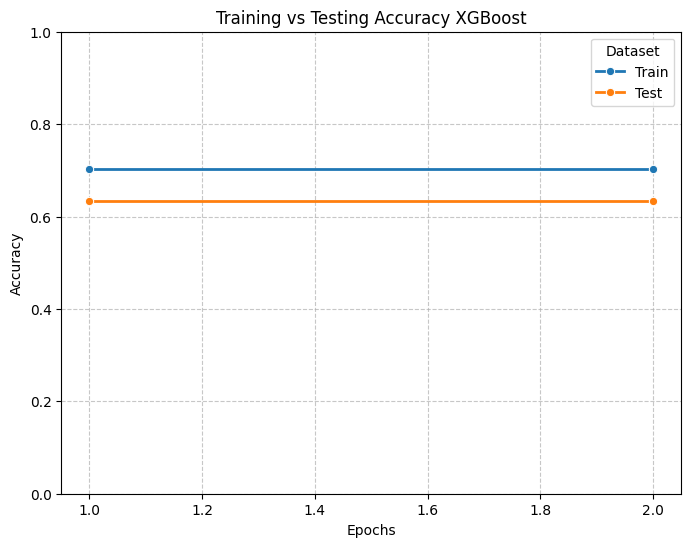

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Predict on train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Epoch': [1, 2],  # Assuming one epoch for simplicity
    'Train': [train_accuracy, train_accuracy],  # Replace with actual per-epoch accuracies if available
    'Test': [test_accuracy, test_accuracy],     # Replace with actual per-epoch accuracies if available
}

df = pd.DataFrame(accuracy_data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Epoch', var_name='Type', value_name='Accuracy')

# Line plot for Training and Testing accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Accuracy', hue='Type', marker='o', linewidth=2)
plt.title('Training vs Testing Accuracy XGBoost')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is in [0, 1] for better understanding
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()


Train Accuracy: 0.7018194444444444
Test Accuracy: 0.6342777777777778


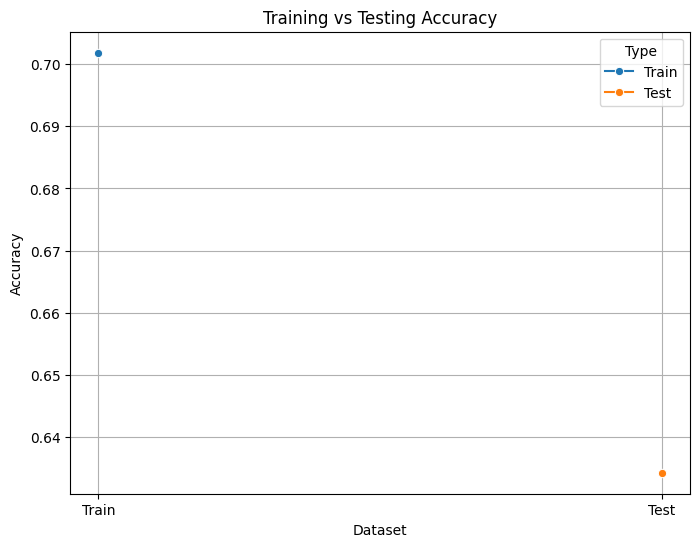

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd

# Predict on train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Accuracy': [train_accuracy, test_accuracy],
    'Type': ['Train', 'Test']
}
df = pd.DataFrame(accuracy_data)

# Line plot for Training vs Testing accuracy using seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Type', y='Accuracy', hue='Type', marker='o')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


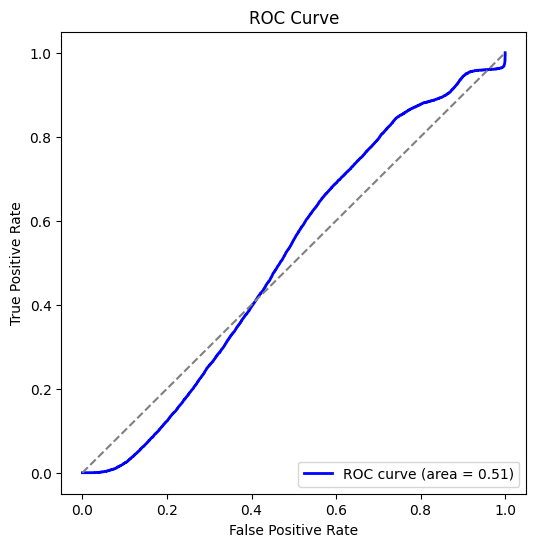

In [109]:
y_test_bin = label_binarize(y_test, classes=[1,2,3,4,5,6])
y_train_bin = label_binarize(y_train, classes=[0,1,2,3,4,5,6])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), xgb_model.predict_proba(X_test).ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

After FineTuning

RandomForest classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'class_weight': 'balanced', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 63}
Random Forest Classifier (Tuned):
Accuracy: 0.6684444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      3041
           1       0.57      0.40      0.47      3016
           2       0.58      0.63      0.60      3017
           3       0.69      0.72      0.70      3029
           4       0.57      0.62      0.59      3020
           5       0.97      1.00      0.99      2877

    accuracy                           0.67     18000
   macro avg       0.67      0.67      0.67     18000
weighted avg       0.66      0.67      0.66     18000

Confusion Matrix:
[[2002  257  230  139  397   16]
 [ 446 1207  479  253  624    7]
 [ 205  252 1886  440  219   15]
 [ 147  118  371 2194  173   26]
 

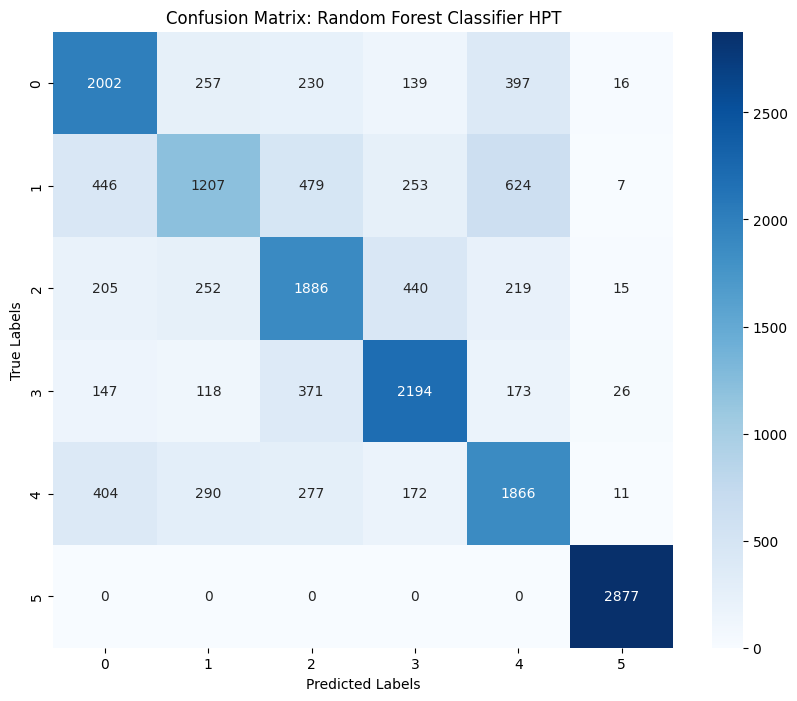

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),  # Randomized number of trees between 50 and 200
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),  # Randomized split values
    'min_samples_leaf': randint(1, 5),  # Randomized leaf size
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the model with random search
random_search.fit(X_train, y_train)

# Best parameters found by RandomizedSearchCV
print("Best parameters found: ", random_search.best_params_)

# Best model from the search
best_rf = random_search.best_estimator_

# Evaluate the tuned model
y_pred_rf = best_rf.predict(X_test)

print("Random Forest Classifier (Tuned):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix: Random Forest Classifier HPT")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Train Accuracy: 0.867875
Test Accuracy: 0.6684444444444444


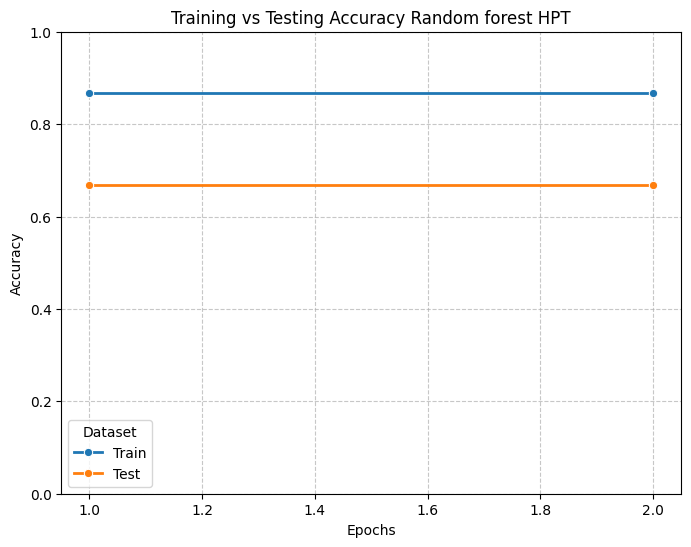

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Predict on train and test data
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Epoch': [1, 2],  # Assuming one epoch for simplicity
    'Train': [train_accuracy, train_accuracy],  # Replace with actual per-epoch accuracies if available
    'Test': [test_accuracy, test_accuracy],     # Replace with actual per-epoch accuracies if available
}

df = pd.DataFrame(accuracy_data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Epoch', var_name='Type', value_name='Accuracy')

# Line plot for Training and Testing accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Accuracy', hue='Type', marker='o', linewidth=2)
plt.title('Training vs Testing Accuracy Random forest HPT')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is in [0, 1] for better understanding
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()


Train Accuracy: 0.867875
Test Accuracy: 0.6684444444444444


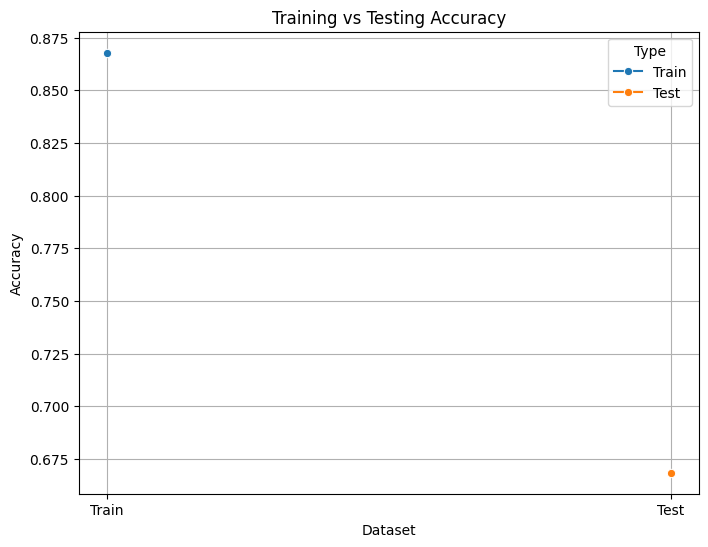

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Predict on train and test data
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Accuracy': [train_accuracy, test_accuracy],
    'Type': ['Train', 'Test']
}
df = pd.DataFrame(accuracy_data)

# Line plot for Training vs Testing accuracy using seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Type', y='Accuracy', hue='Type', marker='o')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


decision tree

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\merug\Desktop\nlp\nlp\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\merug\Desktop\nlp\nlp\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\merug\Desktop\nlp\nlp\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\merug\Desktop\nlp\nlp\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\merug\De

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree Accuracy: 0.6112777777777778
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      3041
           1       0.44      0.44      0.44      3016
           2       0.53      0.53      0.53      3017
           3       0.64      0.65      0.65      3029
           4       0.52      0.49      0.50      3020
           5       0.98      0.99      0.99      2877

    accuracy                           0.61     18000
   macro avg       0.61      0.61      0.61     18000
weighted avg       0.61      0.61      0.61     18000

Decision Tree Confusion Matrix:
[[1787  443  242  159  396   14]
 [ 449 1334  437  259  530    7]
 [ 275  440 1591  439  259   13]
 [ 168  229  468 1956  186   22]
 [ 498  548  272  215 1478    9]
 [   8    4    0    8    0 2857]]


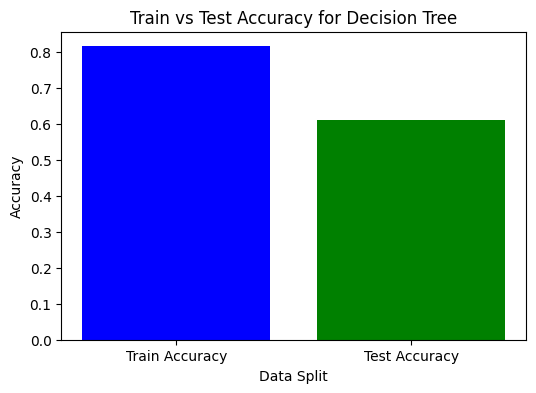

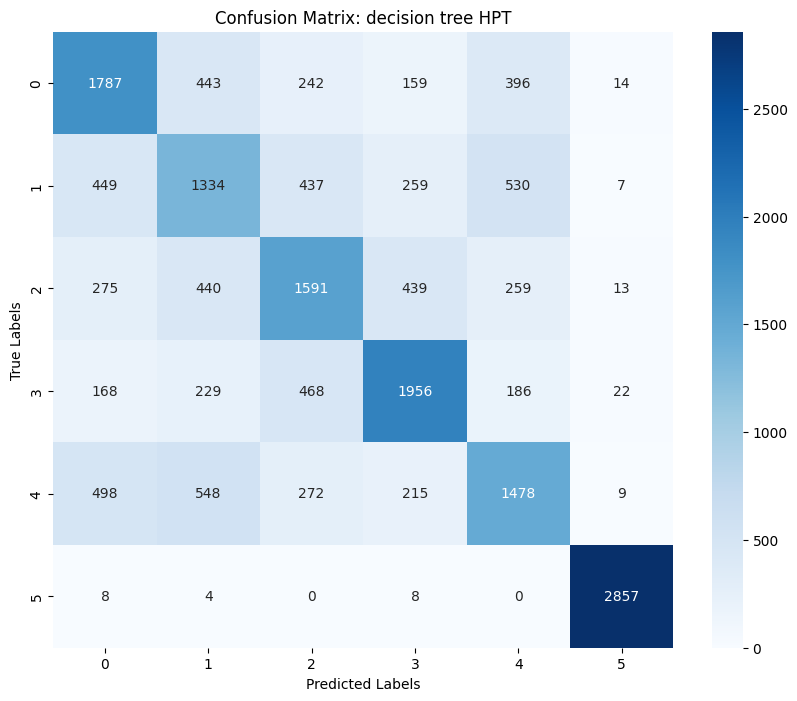

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],               # Try different depths
    'min_samples_split': [2, 5, 10],             # Minimum samples to split
    'min_samples_leaf': [1, 2, 5],               # Minimum samples per leaf
    'max_features': ['auto', 'sqrt', 'log2', None], # Try different max features
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
print("Best Parameters:", grid_search.best_params_)

# Best model from grid search
best_dt = grid_search.best_estimator_

# Make predictions with the best model
y_pred_dt = best_dt.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Plot Train vs Test Accuracy for Decision Tree
train_accuracy = best_dt.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title("Train vs Test Accuracy for Decision Tree")
plt.xlabel("Data Split")
plt.ylabel("Accuracy")
plt.show()
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix: decision tree HPT")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Train Accuracy: 0.7018194444444444
Test Accuracy: 0.6342777777777778


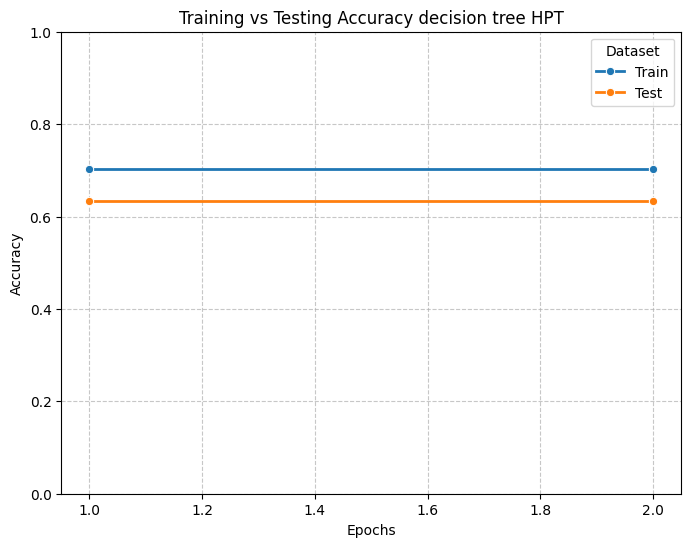

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Predict on train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Epoch': [1, 2],  # Assuming one epoch for simplicity
    'Train': [train_accuracy, train_accuracy],  # Replace with actual per-epoch accuracies if available
    'Test': [test_accuracy, test_accuracy],     # Replace with actual per-epoch accuracies if available
}

df = pd.DataFrame(accuracy_data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Epoch', var_name='Type', value_name='Accuracy')

# Line plot for Training and Testing accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Accuracy', hue='Type', marker='o', linewidth=2)
plt.title('Training vs Testing Accuracy decision tree HPT')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is in [0, 1] for better understanding
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()


Train Accuracy: 0.8161527777777777
Test Accuracy: 0.6112777777777778


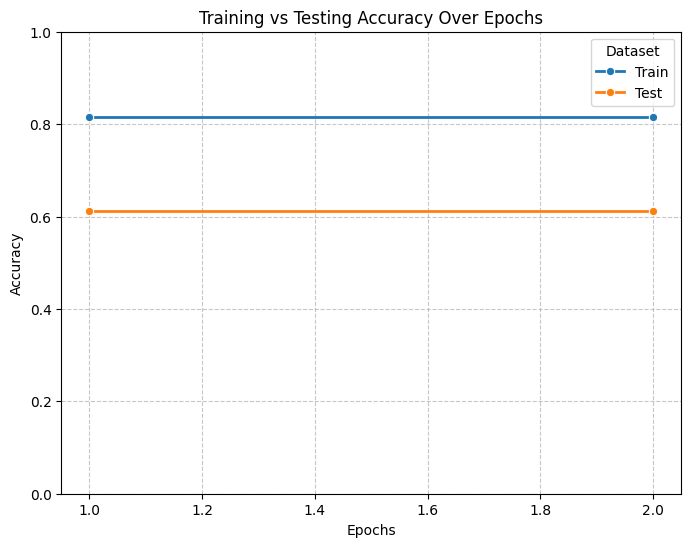

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Predict on train and test data
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Epoch': [1, 2],  # Assuming one epoch for simplicity
    'Train': [train_accuracy, train_accuracy],  # Replace with actual per-epoch accuracies if available
    'Test': [test_accuracy, test_accuracy],     # Replace with actual per-epoch accuracies if available
}

df = pd.DataFrame(accuracy_data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Epoch', var_name='Type', value_name='Accuracy')

# Line plot for Training and Testing accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Accuracy', hue='Type', marker='o', linewidth=2)
plt.title('Training vs Testing Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is in [0, 1] for better understanding
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()


Train Accuracy: 0.8161527777777777
Test Accuracy: 0.6112777777777778


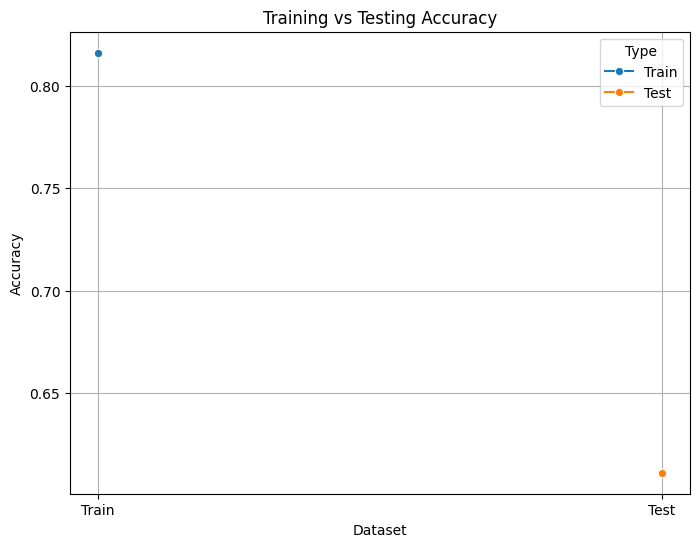

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Predict on train and test data
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Accuracy': [train_accuracy, test_accuracy],
    'Type': ['Train', 'Test']
}
df = pd.DataFrame(accuracy_data)

# Line plot for Training vs Testing accuracy using seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Type', y='Accuracy', hue='Type', marker='o')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


XGBOOST

c:\Users\merug\Desktop\nlp\nlp\lib\site-packages\xgboost\core.py:158: UserWarning: [18:52:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6342777777777778
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      3041
           1       0.51      0.39      0.44      3016
           2       0.56      0.57      0.57      3017
           3       0.67      0.72      0.69      3029
           4       0.54      0.63      0.58      3020
           5       0.95      0.99      0.97      2877

    accuracy                           0.63     18000
   macro avg       0.63      0.64      0.63     18000
weighted avg       0.63      0.63      0.63     18000

XGBoost Confusion Matrix:
[[1583  435  258  124  614   27]
 [ 489 1173  467  235  632   20]
 [ 227  271 1722  530  237   30]
 [ 134  115  406 2169  173   32]
 [ 357  324  216  188 1909   26]
 [   2    4    5    4    1 2861]]


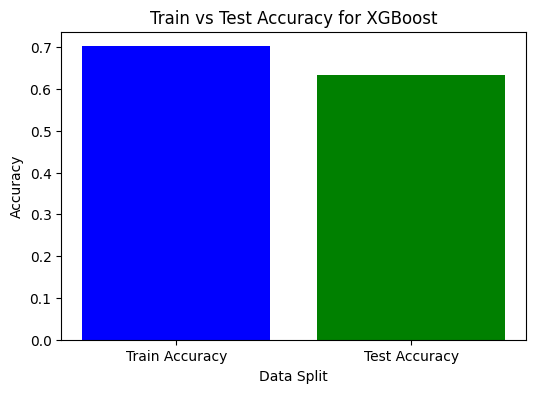

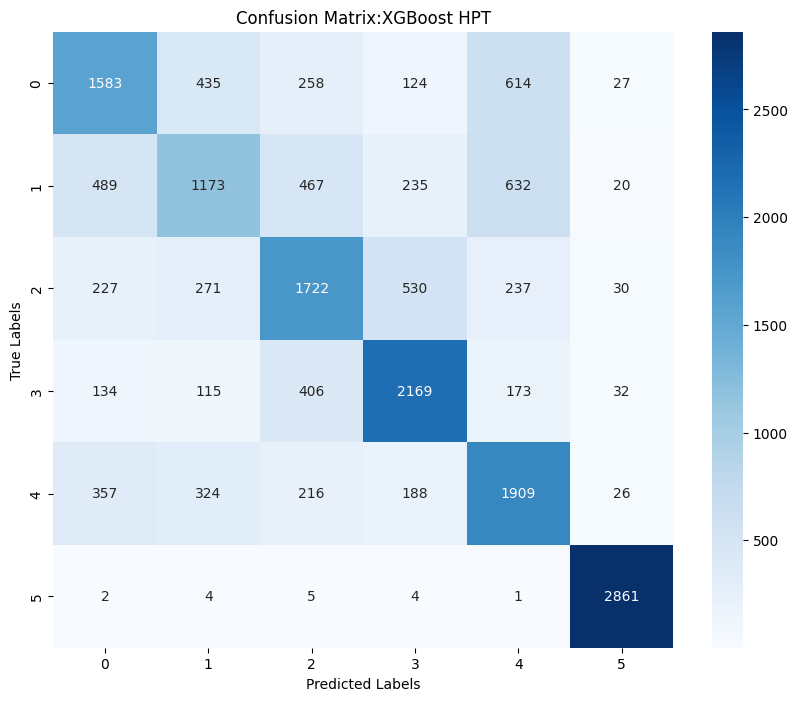

In [119]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Correct the target labels (shift back to original range 0-5)
y = y-1 # Undo the previous y-1 operation to get valid class labels [0, 1, 2, 3, 4, 5]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Plot Train vs Test Accuracy for XGBoost
train_accuracy_xgb = xgb_model.score(X_train, y_train)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy_xgb, test_accuracy_xgb], color=['blue', 'green'])
plt.title("Train vs Test Accuracy for XGBoost")
plt.xlabel("Data Split")
plt.ylabel("Accuracy")
plt.show()
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb
)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix:XGBoost HPT")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
# (Optional) Plot ROC curve if it's a binary classification (skipped here as it's a multi-class problem)


Train Accuracy: 0.7018194444444444
Test Accuracy: 0.6342777777777778


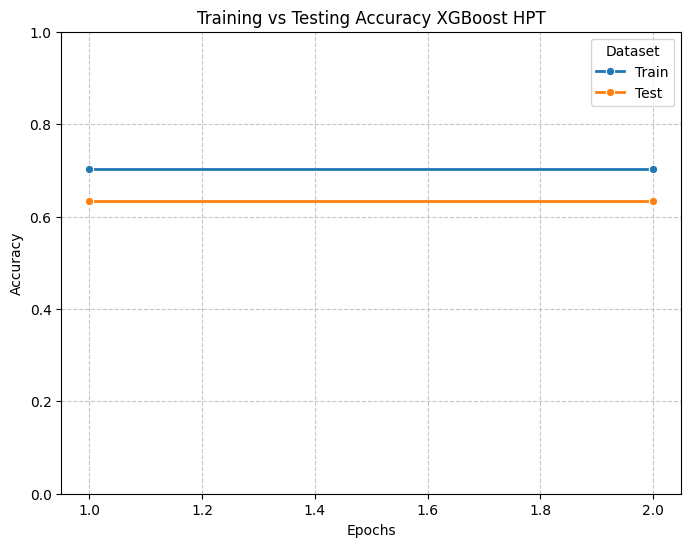

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Predict on train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Epoch': [1, 2],  # Assuming one epoch for simplicity
    'Train': [train_accuracy, train_accuracy],  # Replace with actual per-epoch accuracies if available
    'Test': [test_accuracy, test_accuracy],     # Replace with actual per-epoch accuracies if available
}

df = pd.DataFrame(accuracy_data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Epoch', var_name='Type', value_name='Accuracy')

# Line plot for Training and Testing accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Accuracy', hue='Type', marker='o', linewidth=2)
plt.title('Training vs Testing Accuracy XGBoost HPT')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is in [0, 1] for better understanding
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()


Train Accuracy: 0.7018194444444444
Test Accuracy: 0.6342777777777778


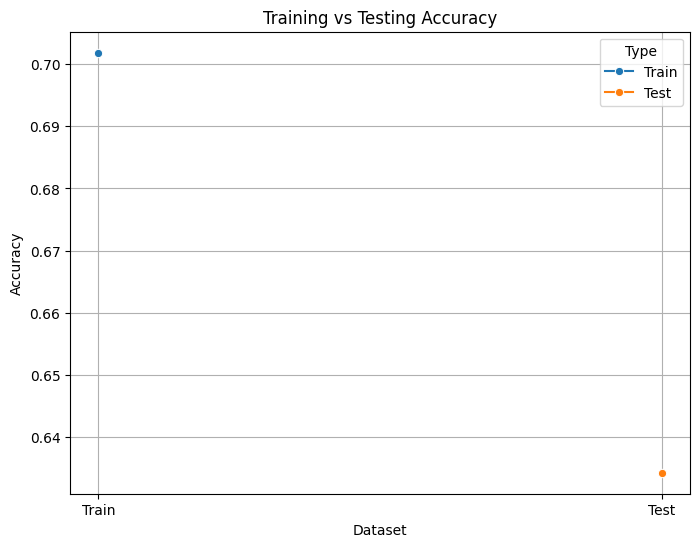

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Predict on train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Accuracy': [train_accuracy, test_accuracy],
    'Type': ['Train', 'Test']
}
df = pd.DataFrame(accuracy_data)

# Line plot for Training vs Testing accuracy using seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Type', y='Accuracy', hue='Type', marker='o')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Train Accuracy: 0.7018194444444444
Test Accuracy: 0.6342777777777778


C:\Users\merug\AppData\Local\Temp\ipykernel_18664\390762955.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Type', y='Accuracy', palette='viridis')


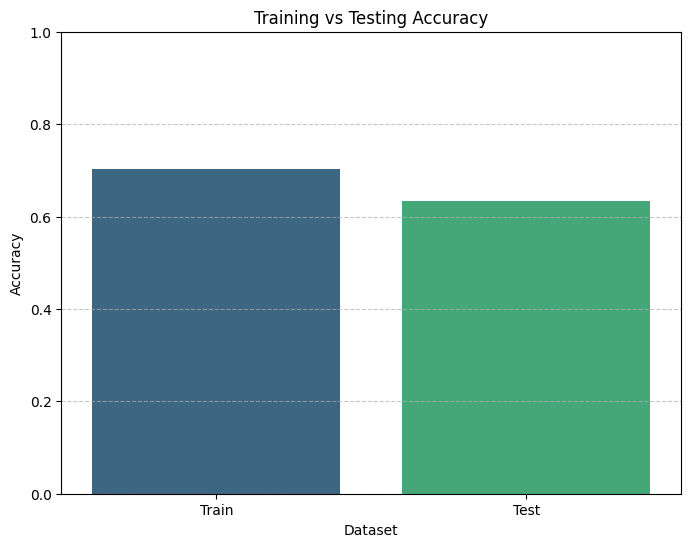

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd

# Predict on train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Accuracy': [train_accuracy, test_accuracy],
    'Type': ['Train', 'Test']
}
df = pd.DataFrame(accuracy_data)

# Bar plot for Training vs Testing accuracy using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Type', y='Accuracy', palette='viridis')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is in [0, 1] for better understanding
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


Train Accuracy: 0.7018194444444444
Test Accuracy: 0.6342777777777778


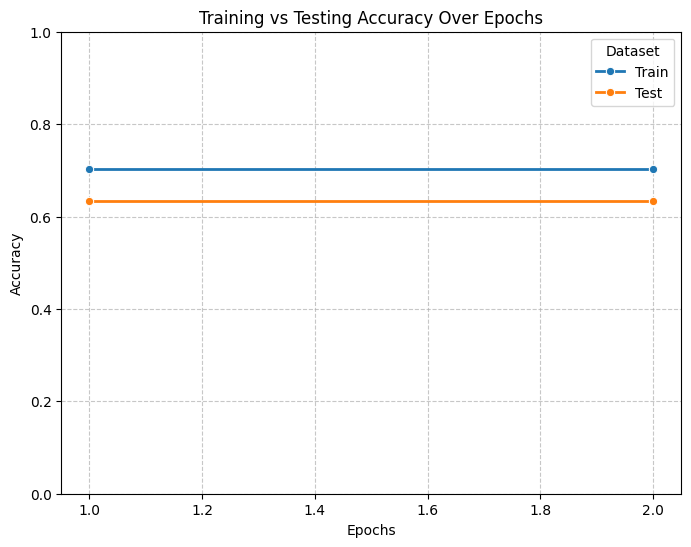

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Predict on train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Prepare DataFrame for seaborn plotting
accuracy_data = {
    'Epoch': [1, 2],  # Assuming one epoch for simplicity
    'Train': [train_accuracy, train_accuracy],  # Replace with actual per-epoch accuracies if available
    'Test': [test_accuracy, test_accuracy],     # Replace with actual per-epoch accuracies if available
}

df = pd.DataFrame(accuracy_data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Epoch', var_name='Type', value_name='Accuracy')

# Line plot for Training and Testing accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Accuracy', hue='Type', marker='o', linewidth=2)
plt.title('Training vs Testing Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is in [0, 1] for better understanding
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()
